# 2. Exploratory Analysis

In [2]:
import mclearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from sklearn.decomposition import PCA
%matplotlib inline
plt.style.use('ggplot')

In [10]:
# read in the data
sdss = pd.io.parsers.read_csv("data/sdss_dr7_photometry_source.csv.gz", compression="gzip")
fig_dir = '../reports/alasdair/thesis/figures/'

In [2]:
import mclearn.active

## Distribution of Classes

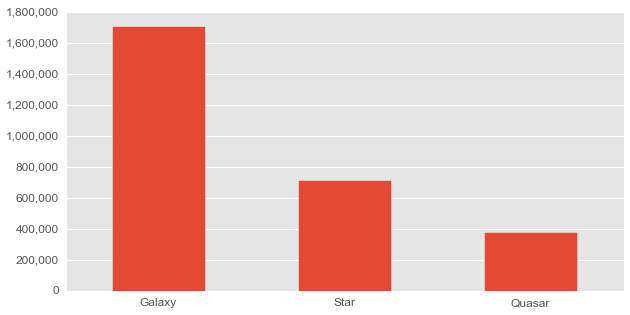

In [6]:
fig = plt.figure(figsize=(10, 5))
ax = mclearn.plot_class_distribution(sdss['class'])
fig.savefig(fig_dir + 'bar_training_class_distribution.pdf', bbox_inches='tight')

## Maps of Classes

We have around 2.8 million labelled data points. Below are the maps showing how the three classes - galaxies, stars, and quasars - are distributed. Here we use the Mollweide projection, with the following coordinate layout. The red line is the plane of the Milky Way.

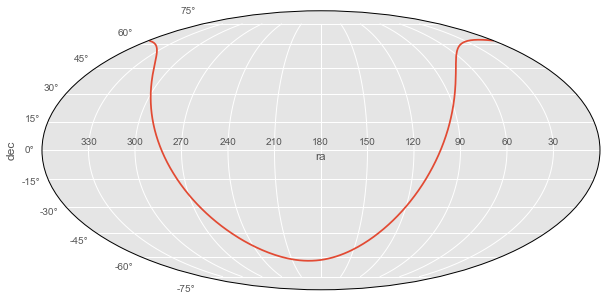

In [5]:
fig = plt.figure(figsize=(10,5))
zero_values = np.zeros(1)
ax = mclearn.plot_hex_map(zero_values, zero_values, axisbg=None, colorbar=False, labels=True)
fig.savefig(fig_dir + 'map_mollweide.pdf', bbox_inches='tight')

Here are the distribution map of galaxies, stars, and quasars, respectively.

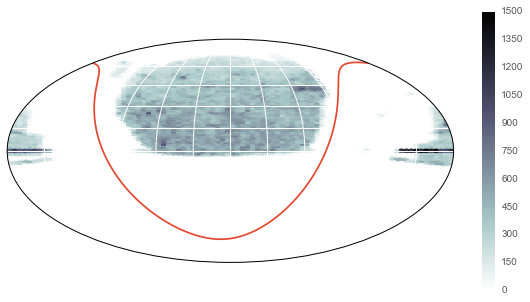

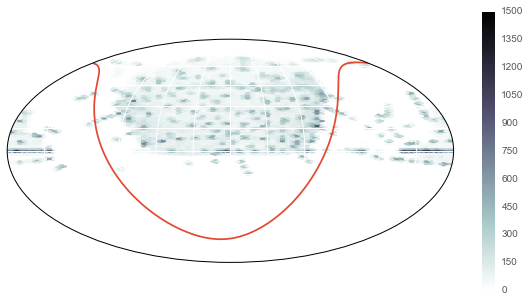

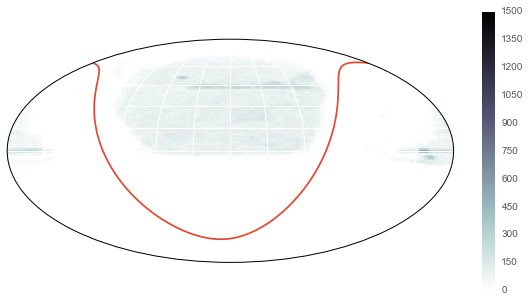

In [7]:
# make Boolean index of each object
is_galaxy = sdss['class']=='Galaxy'
is_star = sdss['class']=='Star'
is_quasar = sdss['class']=='Quasar'

# extract the coordinates of each object
galaxy_ra, galaxy_dec = sdss[is_galaxy]['ra'], sdss[is_galaxy]['dec']
star_ra, star_dec = sdss[is_star]['ra'], sdss[is_star]['dec']
quasar_ra, quasar_dec = sdss[is_quasar]['ra'], sdss[is_quasar]['dec']

# plot galaxy map
fig = plt.figure(figsize=(10,5))
ax = mclearn.plot_hex_map(galaxy_ra, galaxy_dec)
fig.savefig(fig_dir + 'map_train_galaxies.png', bbox_inches='tight', dpi=300)

# plot star map
fig = plt.figure(figsize=(10,5))
ax = mclearn.plot_hex_map(star_ra, star_dec)
fig.savefig(fig_dir + 'map_train_stars.png', bbox_inches='tight', dpi=300)

# plot quasar map
fig = plt.figure(figsize=(10,5))
ax = mclearn.plot_hex_map(quasar_ra, quasar_dec)
fig.savefig(fig_dir + 'map_train_quasars.png', bbox_inches='tight', dpi=300)

## Photometry vs Spectroscopy

To see the difference between photometry and spectroscopy, we plot the spectrum of Vega (which gives us a lot of information but this is expensive to obtain) and the 5 ugriz photometric filters.

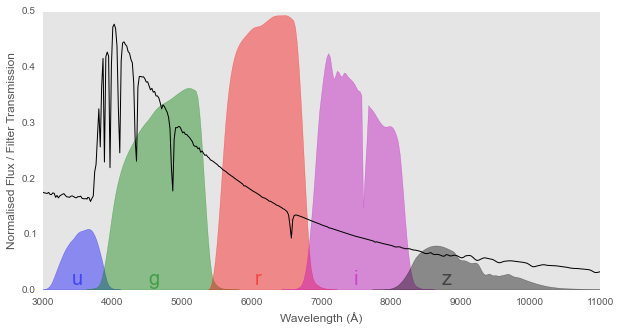

In [11]:
vega_spectrum_url = 'http://www.astro.washington.edu/users/ivezic/DMbook/data/1732526_nic_002.ascii'
ugriz_filter_url = 'http://www.sdss.org/dr7/instruments/imager/filters/%s.dat'

fig = plt.figure(figsize=(10,5))
ax = mclearn.plot_filters_and_spectrum(ugriz_filter_url, vega_spectrum_url)
fig.savefig(fig_dir + 'vega_filters_and_spectrum.pdf', bbox_inches='tight')

## PCA and Dimensionality Reduction

We reduce the 11 dimensions down to 2 dimensions using PCA.

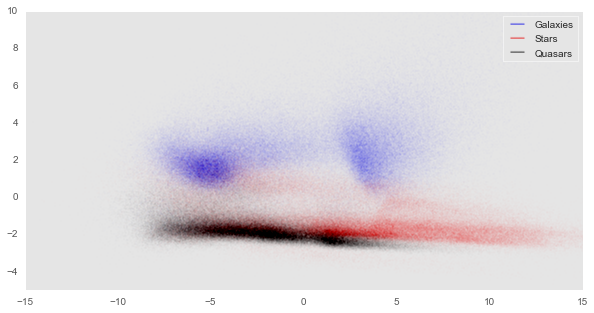

In [4]:
features = ['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z', 'petroMag_u',
            'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'petroRad_r']
X_train, X_test, y_train, y_test = mclearn.balanced_train_test_split(
        sdss, features, 'class', train_size=200000, test_size=100000, random_state=2)

pca = PCA(n_components=2)
projection = pca.fit_transform(X_train)
classes = ['Galaxy', 'Quasar', 'Star']

fig = plt.figure(figsize=(10, 5))
ax = mclearn.plot_scatter_with_classes(projection, y_train, classes)
ax.set_xlim(-15, 15)
ax.set_ylim(-5, 10)
fig.savefig(fig_dir + 'pca_scatter.png', bbox_inches='tight', dpi=300)